<a href="https://colab.research.google.com/github/p0lsol/programming_basics/blob/main/6_scraping_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1**

Написать функцию для скрейпинга веб-страниц

In [6]:
'''
Импортируйте библиотеки для скрейпинга веб-страниц
'''
import requests
from bs4 import BeautifulSoup

In [7]:
'''
Допишите функцию для скрейпинга
'''

def scrape_text_from_url(url, tag, class_=None):
    response = requests.get(url)
    if response.status_code == 200:
      soup = BeautifulSoup(response.text, 'html.parser')
      paragraphs = soup.find_all(tag, class_) # ищем теги и классы на основании аргументов функции; по умолчанию ищем только тег
      text = ''
      for p in paragraphs:
        text += p.get_text()
      return text
    else:
      print('Error:', response.status_code)
      return None

In [8]:
'''
Проверяем функцию для скрейпинга: пример 1
'''

scrape_text_from_url('https://en.wikipedia.org/wiki/Chomsky_hierarchy', 'p')

'The Chomsky hierarchy in the fields of formal language theory, computer science, and linguistics, is a containment hierarchy of classes of formal grammars. A formal grammar describes how to form strings from a language\'s vocabulary (or alphabet) that are valid according to the language\'s syntax. The linguist Noam Chomsky theorized that four different classes of formal grammars existed that could generate increasingly complex languages. Each class can also completely generate the language of all inferior classes (set inclusive).\nThe general idea of a hierarchy of grammars was first described by Noam Chomsky in "Three models for the description of language" during the formalization of transformational-generative grammar (TGG).[1] Marcel-Paul Schützenberger also played a role in the development of the theory of formal languages; the paper "The algebraic theory of context free languages"[2] describes the modern hierarchy, including context-free grammars.[3]\nIndependently, alongside li

In [9]:
'''
Проверяем функцию для скрейпинга: пример 2
'''

scrape_text_from_url('https://www.rottentomatoes.com/m/civil_war_2024/reviews', 'p', 'review-text')

"Civil War is not a film about why extreme division happens; it’s about the personal impact of division at its worst.A staggering and frequently brilliant film looking at a hopefully just fictionalized version of America destroying itself from within.Garland seems poised to be make political points, to show how our current political dysfunction could lead to something far worse… but he never follows through.This violent tale of anaesthetised reporters is just a war yarn with a twist.This easy digital fakeness is there to get the audience used to it...Rather than glorifying war, the film is artful and meditative, making us feel the pointlessness of this violence, how unglamorous and exhausting and unheroic it is.It’s not always subtle, and in some cases it’s even frustrating with some of its narrative decisions, but nothing can deny its uncanny ability to leave you horrified by how war, civil or otherwise, can be truly monstrous from any humanist angle.The film isn’t very deep, but it d

**Задание 2**
Написать функцию для сентимент-анализа

In [10]:
'''
Загружаем списки слов с положительным и отрицательным значением
'''

!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt

with open('neg.txt') as f:
  neg = f.read()

with open('pos.txt') as f:
  pos = f.read()

--2024-12-12 09:59:57--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44759 (44K) [text/plain]
Saving to: ‘neg.txt’

neg.txt             100%[===================>]  43.71K  --.-KB/s    in 0.001s  

2024-12-12 09:59:58 (34.7 MB/s) - ‘neg.txt’ saved [44759/44759]

--2024-12-12 09:59:58--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19093 (19K) [text/plain]
Saving t

In [11]:
'''
Создайте списки слов, разделив строку по знаку \n
'''

pos_list, neg_list = pos.split('\n'), neg.split('\n')

pos_list[:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [12]:
'''
Допишите функцию для анализа тональности
Функция принимает на вход 3 аргумента:
  - переменную text с текстов для анализа
  - 2 списка со словами для анализа тональности: positive_words и negative_words
'''
import re
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

def analyze_sentiment (text, positive_words, negative_words):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)

    # Считаем скор тональности: количество пересечений между списками words и положительными / отрицательными словами
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    if positive_count > negative_count:
      return 'positive'
    elif negative_count > positive_count:
      return 'negative'
    else:
      return 'neutral'

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [13]:
'''
Проверяем функцию для анализа тональности: пример 1
'''

analyze_sentiment('This sample text is awesome!', pos_list, neg_list)

'positive'

In [14]:
'''
Проверяем функцию для анализа тональности: пример 2
'''

analyze_sentiment('I hate this sample text.', pos_list, neg_list)

'negative'

In [15]:
'''
Проверяем функцию для анализа тональности: пример 3
'''

analyze_sentiment('We love and hate this sample text at the same time!', pos_list, neg_list)

'neutral'

**Задача 3**

Написать функцию для вывода сентимент-скоров

In [16]:
'''
Допишите функцию для вывода скоров по заданному URL
'''
def analyze(positive_words, negative_words, url, tag, class_=None):
  scraped_text = scrape_text_from_url(url, tag, class_)
  sentences = scraped_text.split('.')
  sentiments = []
  for sentence in sentences:
    sentiment = analyze_sentiment(sentence, positive_words, negative_words)
    sentiments.append(sentiment)
  return sentiments


In [17]:
'''
Тест 1
'''

analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg)[:10]

['neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative']

In [18]:
'''
Тест 2
'''

analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg)[:10]

['negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'positive']

**Задача 4**

Визуализировать результаты анализа

In [19]:
'''
Создаем частотный словарь с помощью библиотеки Counter.
Можно выбрать другие веб-страницы для анализа!
'''

from collections import Counter

sample1 = Counter(analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg))
sample2 = Counter(analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg))

sample1

Counter({'neutral': 7, 'negative': 33, 'positive': 4})

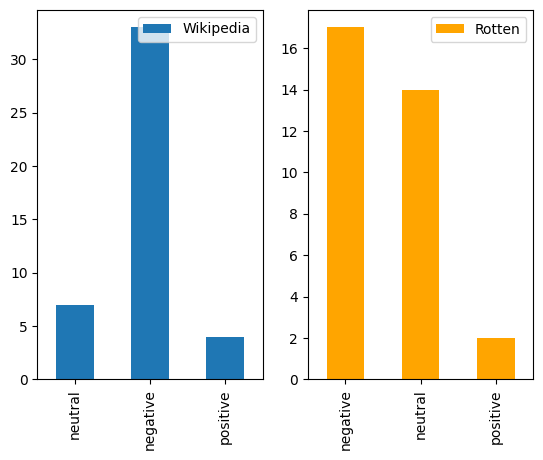

In [20]:
'''
Создаем визуализацию: попробуйте использование новые данные (данные других url)
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.DataFrame.from_dict(sample1, orient='index', columns=['Wikipedia'])
df2 = pd.DataFrame.from_dict(sample2, orient='index', columns=['Rotten'])

fig, ax = plt.subplots(ncols=2)

ax[0] = df1.plot.bar(ax=ax[0])
ax[1] = df2.plot.bar(ax=ax[1], color='orange')

**Задача 5**

Соберите все 3 функции в одной ячейке ниже. Проанализируйте получшившийся код. Сделайте ревью!

Попробуйте сделать **рефакторинг**: найти повторы в коде, избыточные конструкции и заменить их на более простые и питоничные решения. Рефакторинг ускоряет выполнение кода и упрощает его чтение.

Улучшите код, добавьте строчки для вывода промежуточных и итоговых результатов; запустите ячейку.

Это творческое задание, правильных решений нет - главное, чтобы код работал! :)

Не забудьте закомментировать свои изменения.

In [37]:
def scrape_text_from_url(url, tag, class_=None):
    response = requests.get(url)
    if response.status_code == 200:
      soup = BeautifulSoup(response.text, 'html.parser')
      paragraphs = soup.find_all(tag, class_) # ищем теги и классы на основании аргументов функции; по умолчанию ищем только тег
      text = ''
      for p in paragraphs:
        text += p.get_text()
      return text
    else:
      print('Error:', response.status_code)
      return None
print(scrape_text_from_url('https://en.wikipedia.org/wiki/Chomsky_hierarchy', 'p'))

import re
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
def analyze_sentiment(text, positive_words, negative_words):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    positive_count = sum(1 for word in words if word in set(positive_words))
    negative_count = sum(1 for word in words if word in set(negative_words))
    return 'positive' if positive_count > negative_count else 'negative' if negative_count > positive_count else 'neutral' #в одну строчку наеврное питоничнее
print(analyze_sentiment('This sample text is awesome!', pos_list, neg_list))

def analyze(positive_words, negative_words, url, tag, class_=None):
    scraped_text = scrape_text_from_url(url, tag, class_)
    if scraped_text:
        return [analyze_sentiment(sentence, positive_words, negative_words) for sentence in scraped_text.split('.')]  #просто все в строчку опять
print(analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg))

positive


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
